# **Hotel Booking Analysis and Predictive Modeling**

Importing necessary libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn.svm import LinearSVC
import plotly.express as px

# Suppressing warnings
import warnings
warnings. filterwarnings("ignore")

Loading the dataset

In [3]:
df = pd.read_csv("hotel_booking.csv")

# Exploratory Data Analysis (EDA)

Displaying basic information about the dataset

In [4]:
df.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  customer_type  \
0                        0                     0       2  ...      Transient   
1                        0                     0       2  ...      Transient   
2                        0                     1       1  ...      Transient   
3                        0                     1       1  ...      Transient   
4                        0                     2       2  ...      Transient   

    adr required_car_parking_spaces total_of_special_requests  \
0   0.0                           0                         0   
1   0.0                           0                         0   
2  75.0                           0                         0   
3  75.0                           0                         0   
4  98.0                           0                         1   

  reservation_status reservation_status_date            name  \
0          Check-Out              2015-07-01   Ernest Barnes   
1          Check-Out              2015-07-01    Andrea Baker   
2          Check-Out              2015-07-02  Rebecca Parker   
3          Check-Out              2015-07-02    Laura Murray   
4          Check-Out              2015-07-03     Linda Hines   

                         email  phone-number       credit_card  
0  Ernest.Barnes31@outlook.com  669-792-1661  ************4322  
1       Andrea_Baker94@aol.com  858-637-6955  ************9157  
2   Rebecca_Parker@comcast.net  652-885-2745  ************3734  
3            Laura_M@gmail.com  364-656-8427  ************5677  
4           LHines@verizon.com  713-226-5883  ************5498  

[5 rows x 36 columns]

In [5]:
df.tail()

hotel  is_canceled  lead_time  arrival_date_year  \
119385  City Hotel            0         23               2017   
119386  City Hotel            0        102               2017   
119387  City Hotel            0         34               2017   
119388  City Hotel            0        109               2017   
119389  City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
119385             August                        35   
119386             August                        35   
119387             August                        35   
119388             August                        35   
119389             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
119385                         30                        2   
119386                         31                        2   
119387                         31                        2   
119388                         31                        2   
119389                         29                        2   

        stays_in_week_nights  adults  ...  customer_type     adr  \
119385                     5       2  ...      Transient   96.14   
119386                     5       3  ...      Transient  225.43   
119387                     5       2  ...      Transient  157.71   
119388                     5       2  ...      Transient  104.40   
119389                     7       2  ...      Transient  151.20   

       required_car_parking_spaces total_of_special_requests  \
119385                           0                         0   
119386                           0                         2   
119387                           0                         4   
119388                           0                         0   
119389                           0                         2   

       reservation_status reservation_status_date                name  \
119385          Check-Out              2017-09-06     Claudia Johnson   
119386          Check-Out              2017-09-07      Wesley Aguilar   
119387          Check-Out              2017-09-07        Mary Morales   
119388          Check-Out              2017-09-07  Caroline Conley MD   
119389          Check-Out              2017-09-07      Ariana Michael   

                           email  phone-number       credit_card  
119385       Claudia.J@yahoo.com  403-092-5582  ************8647  
119386      WAguilar@xfinity.com  238-763-0612  ************4333  
119387  Mary_Morales@hotmail.com  395-518-4100  ************1821  
119388   MD_Caroline@comcast.net  531-528-1017  ************7860  
119389      Ariana_M@xfinity.com  422-804-6403  ************4482  

[5 rows x 36 columns]

In [6]:
df.shape

(119390, 36)

In [7]:
df.index

RangeIndex(start=0, stop=119390, step=1)

In [8]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')

In [9]:
# Checking distribution of 'customer_type'
df['customer_type'].value_counts()

Transient          89613
Transient-Party    25124
Contract            4076
Group                577
Name: customer_type, dtype: int64

In [10]:
# Checking for missing values
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [11]:
# Creating a copy of the dataset
df1 = df.copy()
df1.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  customer_type  \
0                        0                     0       2  ...      Transient   
1                        0                     0       2  ...      Transient   
2                        0                     1       1  ...      Transient   
3                        0                     1       1  ...      Transient   
4                        0                     2       2  ...      Transient   

    adr required_car_parking_spaces total_of_special_requests  \
0   0.0                           0                         0   
1   0.0                           0                         0   
2  75.0                           0                         0   
3  75.0                           0                         0   
4  98.0                           0                         1   

  reservation_status reservation_status_date            name  \
0          Check-Out              2015-07-01   Ernest Barnes   
1          Check-Out              2015-07-01    Andrea Baker   
2          Check-Out              2015-07-02  Rebecca Parker   
3          Check-Out              2015-07-02    Laura Murray   
4          Check-Out              2015-07-03     Linda Hines   

                         email  phone-number       credit_card  
0  Ernest.Barnes31@outlook.com  669-792-1661  ************4322  
1       Andrea_Baker94@aol.com  858-637-6955  ************9157  
2   Rebecca_Parker@comcast.net  652-885-2745  ************3734  
3            Laura_M@gmail.com  364-656-8427  ************5677  
4           LHines@verizon.com  713-226-5883  ************5498  

[5 rows x 36 columns]

# EDA Visualizations

Histograms

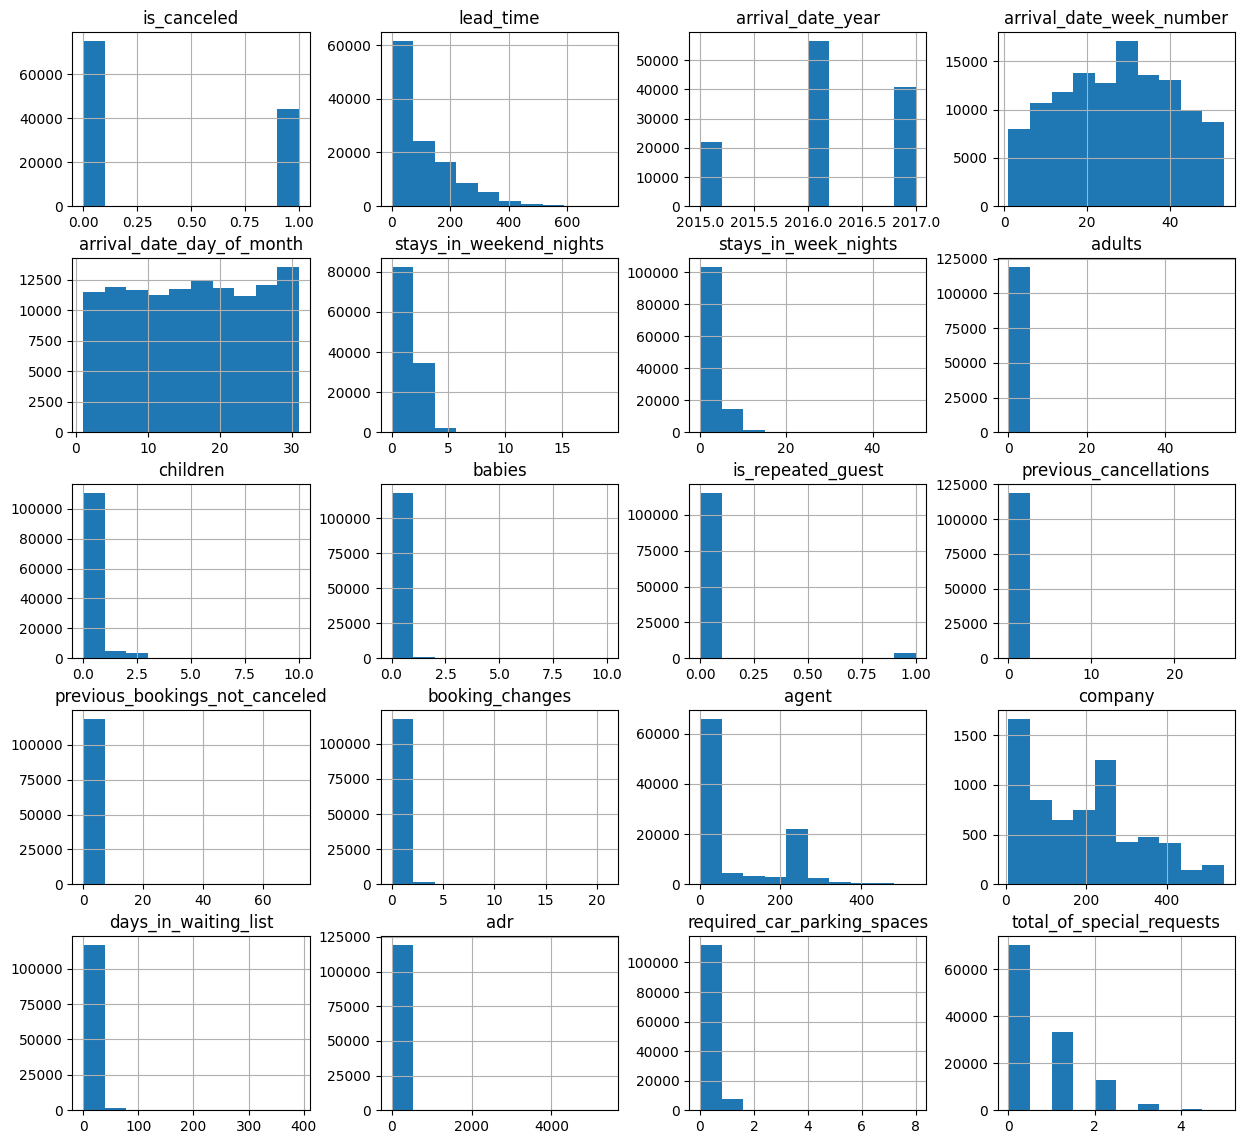

In [12]:
df1.hist(figsize=(15,14))
plt.show()

Violin plot

<Axes: xlabel='is_repeated_guest', ylabel='previous_cancellations'>

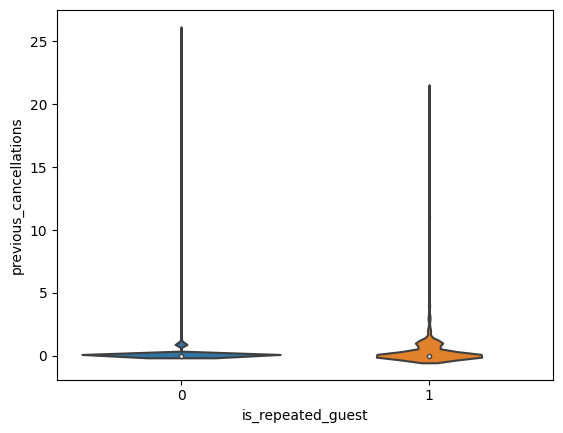

In [13]:
sns.violinplot(data=df1,x = 'is_repeated_guest',y ='previous_cancellations')

 Line plot

In [14]:
px.line(df1, x= 'hotel', y='lead_time', template = 'plotly_dark')

Histogram with color differentiation

In [15]:
fig = px.histogram(df1, x = 'arrival_date_month', y= 'arrival_date_year', color= 'hotel')
fig.show()

 Box plot

In [16]:
fig = px.box(df, x= 'stays_in_weekend_nights', y = 'reservation_status', color = 'market_segment')
fig.show()

 Correlation heatmap

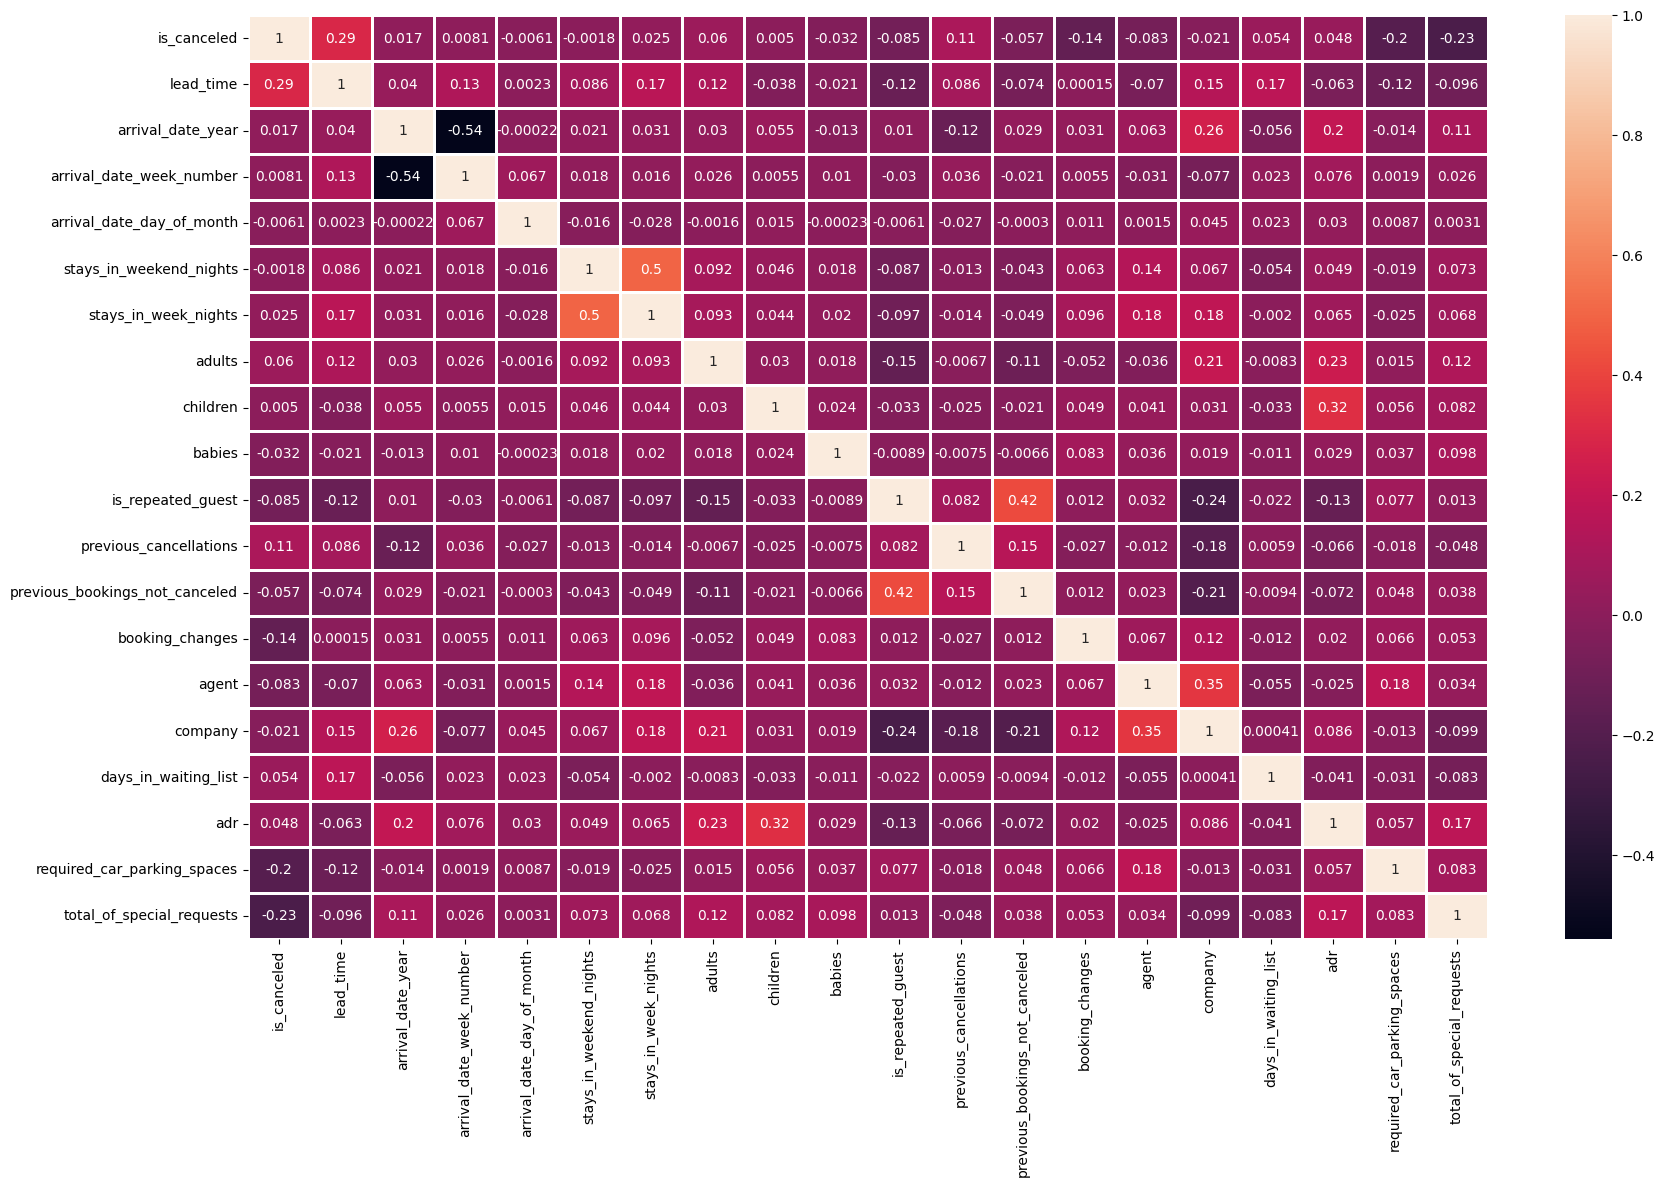

In [18]:
plt.figure(figsize = (20,12))

corr = df1.corr()
sns.heatmap(corr, annot = True, linewidths = 1)
plt.show()

# Dropping unwanted columns

In [19]:
df1.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [20]:
null = 100 * (df1.isna().sum()/ df1.shape[0])
null

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
country                            0.408744
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

Check dataset is balanced dataset or not(imbalanced)

In [21]:
df1['is_canceled'].value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

#our dataset has an imbalanced data

In [ ]:
#babies, adult and children cannot be zero at the same time. so we will drop all onservations having zero at the same time

In [22]:
filter = (df1.children == 0) & (df1.adults == 0) & (df1.babies == 0)
df1[filter]

hotel  is_canceled  lead_time  arrival_date_year  \
2224    Resort Hotel            0          1               2015   
2409    Resort Hotel            0          0               2015   
3181    Resort Hotel            0         36               2015   
3684    Resort Hotel            0        165               2015   
3708    Resort Hotel            0        165               2015   
...              ...          ...        ...                ...   
115029    City Hotel            0        107               2017   
115091    City Hotel            0          1               2017   
116251    City Hotel            0         44               2017   
116534    City Hotel            0          2               2017   
117087    City Hotel            0        170               2017   

       arrival_date_month  arrival_date_week_number  \
2224              October                        41   
2409              October                        42   
3181             November                        47   
3684             December                        53   
3708             December                        53   
...                   ...                       ...   
115029               June                        26   
115091               June                        26   
116251               July                        28   
116534               July                        28   
117087               July                        30   

        arrival_date_day_of_month  stays_in_weekend_nights  \
2224                            6                        0   
2409                           12                        0   
3181                           20                        1   
3684                           30                        1   
3708                           30                        2   
...                           ...                      ...   
115029                         27                        0   
115091                         30                        0   
116251                         15                        1   
116534                         15                        2   
117087                         27                        0   

        stays_in_week_nights  adults  ...    customer_type     adr  \
2224                       3       0  ...  Transient-Party    0.00   
2409                       0       0  ...        Transient    0.00   
3181                       2       0  ...  Transient-Party    0.00   
3684                       4       0  ...  Transient-Party    0.00   
3708                       4       0  ...  Transient-Party    0.00   
...                      ...     ...  ...              ...     ...   
115029                     3       0  ...        Transient  100.80   
115091                     1       0  ...        Transient    0.00   
116251                     1       0  ...        Transient   73.80   
116534                     5       0  ...  Transient-Party   22.86   
117087                     2       0  ...        Transient    0.00   

       required_car_parking_spaces total_of_special_requests  \
2224                             0                         0   
2409                             0                         0   
3181                             0                         0   
3684                             0                         0   
3708                             0                         0   
...                            ...                       ...   
115029                           0                         0   
115091                           1                         1   
116251                           0                         0   
116534                           0                         1   
117087                           0                         0   

       reservation_status reservation_status_date                name  \
2224            Check-Out              2015-10-06   Colleen Hernandez   
2409            Check-Out              2015-10-1

In [23]:
df1 = df1[~filter]
df1
#after dropping

hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   
2                    July                        27   
3                    July                        27   
4                    July                        27   
...                   ...                       ...   
119385             August                        35   
119386             August                        35   
119387             August                        35   
119388             August                        35   
119389             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
0                               1                        0   
1                               1                        0   
2                               1                        0   
3                               1                        0   
4                               1                        0   
...                           ...                      ...   
119385                         30                        2   
119386                         31                        2   
119387                         31                        2   
119388                         31                        2   
119389                         29                        2   

        stays_in_week_nights  adults  ...  customer_type     adr  \
0                          0       2  ...      Transient    0.00   
1                          0       2  ...      Transient    0.00   
2                          1       1  ...      Transient   75.00   
3                          1       1  ...      Transient   75.00   
4                          2       2  ...      Transient   98.00   
...                      ...     ...  ...            ...     ...   
119385                     5       2  ...      Transient   96.14   
119386                     5       3  ...      Transient  225.43   
119387                     5       2  ...      Transient  157.71   
119388                     5       2  ...      Transient  104.40   
119389                     7       2  ...      Transient  151.20   

       required_car_parking_spaces total_of_special_requests  \
0                                0                         0   
1                                0                         0   
2                                0                         0   
3                                0                         0   
4                                0                         1   
...                            ...                       ...   
119385                           0                         0   
119386                           0                         2   
119387                           0                         4   
119388                           0                         0   
119389                           0                         2   

       reservation_status reservation_status_date                name  \
0               Check-Out              2015-07-01       Ernest Barnes   
1               Check-Out              2015-07-01        Andrea Baker   

In [ ]:
#from where the most guest are coming?

In [24]:
guest_city = df1[df1['is_canceled'] == 0]['country'].value_counts().reset_index()
guest_city.columns = ['Country', 'No of guests']
guest_city

Country  No of guests
0       PRT         20977
1       GBR          9668
2       FRA          8468
3       ESP          6383
4       DEU          6067
..      ...           ...
160     BHR             1
161     DJI             1
162     MLI             1
163     NPL             1
164     FRO             1

[165 rows x 2 columns]

Graphics Visualization

In [25]:
import folium
from folium.plugins import HeatMap
import plotly.express as px

basemap = folium.Map()
guests_map = px.choropleth(guest_city, locations = guest_city['Country'], color = guest_city['No of guests'], hover_name = guest_city['Country'])
guests_map.show()

Most guests are from Portugal and other countries in Europe

In [26]:
#What are Room prices overnights for each month?

data_resort = df1[(df1['hotel'] == 'Resort Hotel') & (df1['is_canceled'] == 0)]
data_city = df1[(df1['hotel'] == 'City Hotel') & (df1['is_canceled'] == 0)]

resort_hotel = data_resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()
resort_hotel

arrival_date_month         adr
0               April   75.867816
1              August  181.205892
2            December   68.410104
3            February   54.147478
4             January   48.761125
5                July  150.122528
6                June  107.974850
7               March   57.056838
8                 May   76.657558
9            November   48.706289
10            October   61.775449
11          September   96.416860

In [27]:
city_hotel = data_city.groupby(['arrival_date_month'])['adr'].mean().reset_index()              #adr-(average daily rate).
city_hotel

arrival_date_month         adr
0               April  111.962267
1              August  118.674598
2            December   88.401855
3            February   86.520062
4             January   82.330983
5                July  115.818019
6                June  117.874360
7               March   90.658533
8                 May  120.669827
9            November   86.946592
10            October  102.004672
11          September  112.776582

In [28]:
#Combine the data and create a DataFrame
final_hotel = pd.DataFrame({
    'month': resort_hotel['arrival_date_month'],
    'price_for_resort': resort_hotel['adr'],
    'price_for_city_hotel': city_hotel['adr']
})

# Display the final DataFrame
print(final_hotel)

        month  price_for_resort  price_for_city_hotel
0       April         75.867816            111.962267
1      August        181.205892            118.674598
2    December         68.410104             88.401855
3    February         54.147478             86.520062
4     January         48.761125             82.330983
5        July        150.122528            115.818019
6        June        107.974850            117.874360
7       March         57.056838             90.658533
8         May         76.657558            120.669827
9    November         48.706289             86.946592
10    October         61.775449            102.004672
11  September         96.416860            112.776582


In [ ]:
#Now we observe here that month column is not in order, and if we visualize we will get improper conclusions. So, first we have to provide right hierarchy to month column.

In [29]:
final_hotel.reset_index(drop=True, inplace=True)
final_hotel

# Now the DataFrame will have default integer-based index

month  price_for_resort  price_for_city_hotel
0       April         75.867816            111.962267
1      August        181.205892            118.674598
2    December         68.410104             88.401855
3    February         54.147478             86.520062
4     January         48.761125             82.330983
5        July        150.122528            115.818019
6        June        107.974850            117.874360
7       March         57.056838             90.658533
8         May         76.657558            120.669827
9    November         48.706289             86.946592
10    October         61.775449            102.004672
11  September         96.416860            112.776582

In [30]:
!pip install sort-dataframeby-monthorweek
!pip install sorted-months-weekdays

  Preparing metadata (setup.py) ... done
  Created wheel for sort-dataframeby-monthorweek: filename=sort_dataframeby_monthorweek-0.4-py3-none-any.whl size=3419 sha256=095419b241413e9993bc8ccaa076da691e23ea125ec1b22162df622109c4c1e5
  Stored in directory: /root/.cache/pip/wheels/6b/fd/39/06eaac8d65d641f9f50856a48b57a5ec8351be2874beff01ec
Successfully built sort-dataframeby-monthorweek
  Preparing metadata (setup.py) ... done
  Created wheel for sorted-months-weekdays: filename=sorted_months_weekdays-0.2-py3-none-any.whl size=3223 sha256=0b4b3f47fc529351c923e3e9ceeb7f75fc603a6e376b20399241727ce737390a
  Stored in directory: /root/.cache/pip/wheels/bd/b4/f6/2c29a96668a9a13a568134857fd7b7a5186261f00f1d35661c
Successfully built sorted-months-weekdays


In [31]:
import sort_dataframeby_monthorweek as sd
def sort_month(df1, column_name):
    return sd.Sort_Dataframeby_Month(df1, column_name)
final_prices = sort_month(final_hotel, 'month')
final_prices

month  price_for_resort  price_for_city_hotel
0     January         48.761125             82.330983
1    February         54.147478             86.520062
2       March         57.056838             90.658533
3       April         75.867816            111.962267
4         May         76.657558            120.669827
5        June        107.974850            117.874360
6        July        150.122528            115.818019
7      August        181.205892            118.674598
8   September         96.416860            112.776582
9     October         61.775449            102.004672
10   November         48.706289             86.946592
11   December         68.410104             88.401855

Visualize by graphics

In [32]:
plt.figure(figsize = (15, 8))
px.line(final_prices, x = 'month', y = ['price_for_resort','price_for_city_hotel'],
        title = 'Room price per night over the Months', template = 'plotly_dark')

<Figure size 1500x800 with 0 Axes>

In [ ]:
#This plot clearly shows that prices in the Resort Hotel are much higher during the summer

In [33]:
data = df1.drop(['country','agent','company','name','email','phone-number','credit_card'],axis=1)

In [34]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'market_segment', 'distribution_channel', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'reserved_room_type', 'assigned_room_type', 'booking_changes',
       'deposit_type', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [35]:
data.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  \
0                        0                     0       2  ...   
1                        0                     0       2  ...   
2                        0                     1       1  ...   
3                        0                     1       1  ...   
4                        0                     2       2  ...   

   assigned_room_type  booking_changes deposit_type days_in_waiting_list  \
0                   C                3   No Deposit                    0   
1                   C                4   No Deposit                    0   
2                   C                0   No Deposit                    0   
3                   A                0   No Deposit                    0   
4                   A                0   No Deposit                    0   

  customer_type   adr  required_car_parking_spaces  total_of_special_requests  \
0     Transient   0.0                            0                          0   
1     Transient   0.0                            0                          0   
2     Transient  75.0                            0                          0   
3     Transient  75.0                            0                          0   
4     Transient  98.0                            0                          1   

  reservation_status reservation_status_date  
0          Check-Out              2015-07-01  
1          Check-Out              2015-07-01  
2          Check-Out              2015-07-02  
3          Check-Out              2015-07-02  
4          Check-Out              2015-07-03  

[5 rows x 29 columns]

Label Encoding

In [36]:
le = LabelEncoder()

In [37]:
for i in data:
  data[i] =  le.fit_transform(data[i])

In [38]:
data.head()

hotel  is_canceled  lead_time  arrival_date_year  arrival_date_month  \
0      1            0        342                  0                   5   
1      1            0        478                  0                   5   
2      1            0          7                  0                   5   
3      1            0         13                  0                   5   
4      1            0         14                  0                   5   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        26                          0   
1                        26                          0   
2                        26                          0   
3                        26                          0   
4                        26                          0   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  \
0                        0                     0       2  ...   
1                        0                     0       2  ...   
2                        0                     1       1  ...   
3                        0                     1       1  ...   
4                        0                     2       2  ...   

   assigned_room_type  booking_changes  deposit_type  days_in_waiting_list  \
0                   2                3             0                     0   
1                   2                4             0                     0   
2                   2                0             0                     0   
3                   0                0             0                     0   
4                   0                0             0                     0   

   customer_type   adr  required_car_parking_spaces  \
0              2     1                            0   
1              2     1                            0   
2              2  2124                            0   
3              2  2124                            0   
4              2  3523                            0   

   total_of_special_requests  reservation_status  reservation_status_date  
0                          0                   1                      121  
1                          0                   1                      121  
2                          0                   1                      122  
3                          0                   1                      122  
4                          1                   1                      123  

[5 rows x 29 columns]

In [39]:
data

hotel  is_canceled  lead_time  arrival_date_year  arrival_date_month  \
0           1            0        342                  0                   5   
1           1            0        478                  0                   5   
2           1            0          7                  0                   5   
3           1            0         13                  0                   5   
4           1            0         14                  0                   5   
...       ...          ...        ...                ...                 ...   
119385      0            0         23                  2                   1   
119386      0            0        102                  2                   1   
119387      0            0         34                  2                   1   
119388      0            0        109                  2                   1   
119389      0            0        205                  2                   1   

        arrival_date_week_number  arrival_date_day_of_month  \
0                             26                          0   
1                             26                          0   
2                             26                          0   
3                             26                          0   
4                             26                          0   
...                          ...                        ...   
119385                        34                         29   
119386                        34                         30   
119387                        34                         30   
119388                        34                         30   
119389                        34                         28   

        stays_in_weekend_nights  stays_in_week_nights  adults  ...  \
0                             0                     0       2  ...   
1                             0                     0       2  ...   
2                             0                     1       1  ...   
3                             0                     1       1  ...   
4                             0                     2       2  ...   
...                         ...                   ...     ...  ...   
119385                        2                     5       2  ...   
119386                        2                     5       3  ...   
119387                        2                     5       2  ...   
119388                        2                     5       2  ...   
119389                        2                     7       2  ...   

        assigned_room_type  booking_changes  deposit_type  \
0                        2                3             0   
1                        2                4             0   
2                        2                0             0   
3                        0                0             0   
4                        0                0             0   
...                    ...              ...           ...   
119385                   0                0             0   
119386                   4                0             0   
119387                   3                0             0   
119388                   0                0             0   
119389                   0                0             0   

        days_in_waiting_list  customer_type   adr  \
0                          0              2     1   
1                          0              2     1   
2                          0              2  2124   
3                          0              2  2124   
4                          0              2  3523   
...                      ...            ...   ...   
119385                     0              2  3425   
119386                     0              2  8114   
119387                     0              2  6392   
119388                     0              2  3909   
119389                     0              2  6147   

        required_car_parking_spaces  total_of_special_requests  \
0            

In [40]:
data.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status          

Model Training

In [41]:
x= data.drop(['is_canceled'], axis= 1)
y = data['is_canceled']

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x ,y , test_size=0.2, random_state=42)

Model Building

1. K-Nearest Neighbors (KNN)

In [43]:
knn= KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [44]:
y_predict_knn = knn.predict(x_test)


Model evaluation

In [45]:
acc_knn = accuracy_score(y_test, y_predict_knn)
conf = confusion_matrix(y_test, y_predict_knn)
clf_report = classification_report(y_test, y_predict_knn)

# Displaying KNN results
print(f"Accuracy Score of KNN is: ", acc_knn)
print(f"Confusion Matrix of KNN is: \n", conf)

Accuracy Score of KNN is:  0.8573106283029948
Confusion Matrix of KNN is: 
 [[13807  1151]
 [ 2251  6633]]


In [46]:
print(f"Classification Report of KNN is: \n", clf_report)

Classification Report of KNN is: 
               precision    recall  f1-score   support

           0       0.86      0.92      0.89     14958
           1       0.85      0.75      0.80      8884

    accuracy                           0.86     23842
   macro avg       0.86      0.83      0.84     23842
weighted avg       0.86      0.86      0.86     23842



2.Logistic Regression

In [47]:
reg = LogisticRegression()
reg.fit(x_train, y_train)

LogisticRegression()

In [48]:
y_predict_reg = reg.predict(x_test)
acc_reg = accuracy_score(y_test, y_predict_reg)

# Displaying Logistic Regression results
print(f"Accuracy Score of Logistic regression is: ", acc_reg)
print(f"Confusion Matrix): \n", confusion_matrix(y_test, y_predict_reg))

Accuracy Score of Logistic regression is:  0.789908564717725
Confusion Matrix): 
 [[13209  1749]
 [ 3260  5624]]


In [49]:
print(f"Classification Report: \n",classification_report(y_test, y_predict_reg))

Classification Report: 
               precision    recall  f1-score   support

           0       0.80      0.88      0.84     14958
           1       0.76      0.63      0.69      8884

    accuracy                           0.79     23842
   macro avg       0.78      0.76      0.77     23842
weighted avg       0.79      0.79      0.79     23842



 3. Support Vector Machine (SVM)

In [50]:
LinSVC = LinearSVC()
LinSVC.fit(x_train,y_train)

LinearSVC()

In [51]:
LinSVC_y_pred = LinSVC.predict(x_test)

In [56]:
acc_svc = accuracy_score(y_test, LinSVC_y_pred)
conf = confusion_matrix(y_test, LinSVC_y_pred)
clf_report = classification_report(y_test,LinSVC_y_pred)

# Displaying SVM results
print(f"Accuracy Score of SVC is: ", acc_svc)
print(f"Confusion Matrix of SVC is:\n ", conf)

Accuracy Score of SVC is:  0.9901434443419176
Confusion Matrix of SVC is:
  [[14954     4]
 [  231  8653]]


In [57]:
print(f"Classification report of SVC is:\n ", clf_report)

Classification report of SVC is:
                precision    recall  f1-score   support

           0       0.98      1.00      0.99     14958
           1       1.00      0.97      0.99      8884

    accuracy                           0.99     23842
   macro avg       0.99      0.99      0.99     23842
weighted avg       0.99      0.99      0.99     23842



# **Model Comparison**

In [58]:
# Creating a DataFrame for model comparison
models = pd.DataFrame({'Model': ['KNN','Logistic Regression', 'Support Vector Machine'],'Score': [acc_knn,acc_reg,acc_svc]})

# Sorting models by their scores
models.sort_values(by ='Score', ascending = False)

Model     Score
2  Support Vector Machine  0.990143
0                     KNN  0.857311
1     Logistic Regression  0.789909

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_0, *['Score'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_1, *['Score'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_2, *['Model'], **{})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_3, *['Score', 'Model'], **{'inner': 'stick'})
chart

Visualizing model comparison using Plotly

In [59]:
px.bar(data_frame = models, x='Score', y= 'Model', color='Score', template = 'plotly_dark', title = 'Models Comparison')